In [1]:
import requests 
import json 

In [5]:
def url_to_json(url):
    r = requests.get(url)
    return r.json()

def make_page_url(page=None, page_size=None):
    if page is None and page_size is None:
        return "https://phagesdb.org/api/phages/"
    elif page is None:
        return "https://phagesdb.org/api/phages/?page_size={}".format(page_size)
    elif page_size is None:
        return "https://phagesdb.org/api/phages/?page={}".format(page)
    return "https://phagesdb.org/api/phages/?page={}&page_size={}".format(page, page_size)

def download_page(page=None, page_size=None):
    url = make_page_url(page=page, page_size=page_size)
    return url_to_json(url)

def download_phage_info(phage_name):
    url = "https://phagesdb.org/api/phages/{}/".format(phage_name)
    return url_to_json(url)  

def download_sequenced_phages(page, page_size):
    #keep page = 1 and make page_size huge so can download in one go (unless memory is an issue)
    url = "https://phagesdb.org/api/sequenced_phages/?page={}&page_size={}".format(page, page_size)
    return url_to_json(url)

In [16]:
phages_download = download_sequenced_phages(1, 10000)

In [17]:
phages = phages_download['results']
print("downloaded {}/{} phages".format(len(phages), phages_download['count']))
print(phages[0])

downloaded 3496/3496 phages
{'phage_name': '20ES', 'old_names': '', 'program': None, 'naming_notes': '', 'finder_name': 'Franceschelli,J.J., Suarez,C.A., Teran,L., Raya,R.', 'found_city': '', 'found_state': '', 'found_country': 'Argentina', 'found_GPS_lat': '', 'found_GPS_long': '', 'found_year': 2014, 'p_institution': {'institution_code': 'UNDR', 'institution_name': 'Universidad Nacional de Rosario', 'institution_logo': 'https://phagesdb.org/media/institutions/UNR-escudo-1.jpg', 'institution_url': 'http://www.unr.edu.ar/english/'}, 'enriched_sample': None, 'discovery_notes': '', 'isolation_temperature': None, 'growth_notes': '', 'pcluster': {'cluster': 'A', 'temperate': True}, 'psubcluster': {'subcluster': 'A2'}, 'morphotype': 'SIPHO', 'plaque_notes': '', 'lysogeny_notes': '', 'seq_finished': True, 'date_finished': '2014-06-18', 'seq_facility': {'short_name': 'INDEAR', 'facility_name': 'Instituto de Agrobiotecnologia de Rosario', 'contact_person': '', 'shipping_address': '', 'facility

In [18]:
import matplotlib.pyplot as plt
import statistics

def get_cohort_statistics(cohort):
    stats = ['genome_length', 'gcpercent', 'overhang_length']
    stat_samples = [[dicc[ss] for ss in stats] for dicc in cohort]
    stat_samples = list(zip(*stat_samples))
    
    plt.figure(figsize=(30, 10))
    for ii, ss in enumerate(stat_samples):
        ss_rem0 = [s for s in ss if s is not None]
        ss_mean = statistics.mean(ss_rem0)
        ss_stdev = statistics.stdev(ss_rem0)
        print("{} - Mean: {}, STD: {}".format(stats[ii], , ))

        plt.subplot(1, 3, ii+1) 
        plt.title(stats[ii]+" frequency")
        plt.xlabel(stats[ii]+" bins")
        plt.ylabel("occurances")

        if stats[ii] == 'overhang_length':
            plt.hist(ss_rem0, bins = 20, range=(min(ss_rem0), 25))
        else:
            plt.hist(ss_rem0, bins = 20)


genome_length - Mean: 61603.31493135011, STD: 27629.708675987884


TypeError: can't convert type 'str' to numerator/denominator

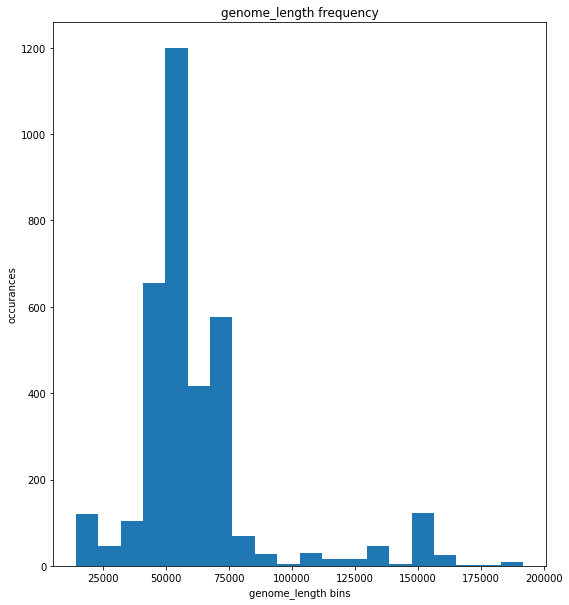

In [19]:
get_cohort_statistics(phages)

In [21]:
statistics.mean([1,2,3,4])
statistics.stdev([1,2,3,4])

1.2909944487358056